In [112]:
import pandas as pd
import matplotlib.pyplot as plt
ridership = pd.read_csv("Fact Ridership long.csv")
calendar = pd.read_csv("MTA  hoildays.csv")
holidays = pd.read_csv("MTA Calendar.csv")

In [8]:
# تحويل التواريخ الى نوع date 
ridership["Date"] = pd.to_datetime(ridership["Date"])
calendar["Date"] = pd.to_datetime(calendar["Date"])
holidays["Date"] = pd.to_datetime(holidays["Date"])


In [56]:
# ربط الملفات ببعضها عن طريق ال date 
df = ridership.merge(calendar, on="Date", how="left") \
                  .merge(holidays, on="Date", how="left")

In [ ]:
# Analysis Q&A

In [42]:
df.groupby("Season")["Ridership"].mean().reset_index().sort_values("Ridership", ascending=False)

,Season,Ridership
0,Fall,727561.105546
1,Spring,644860.877019
3,Winter,642847.315789
2,Summer,641409.272360


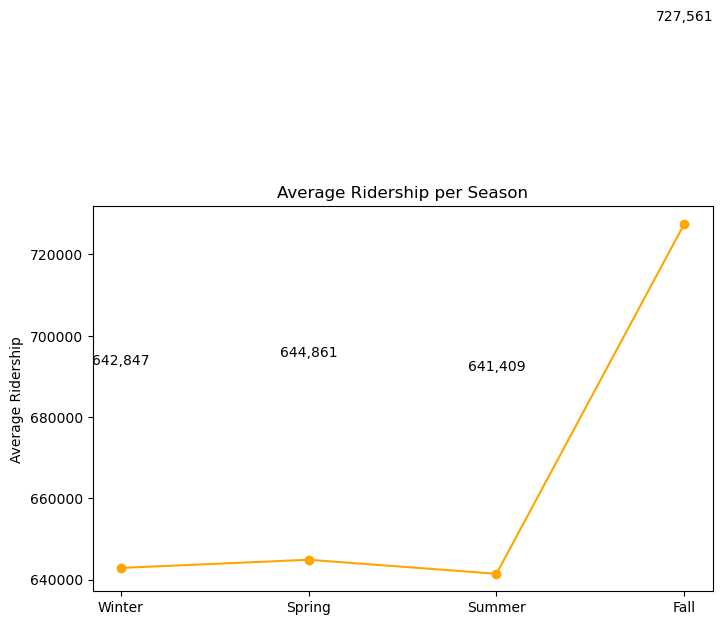

In [138]:
season_order = ["Winter", "Spring", "Summer", "Fall"]
season_avg = df.groupby("Season")["Ridership"].mean().reindex(season_order).reset_index()
plt.figure(figsize=(8,5))
plt.plot(season_avg["Season"], season_avg["Ridership"], marker='o', color="orange")
for i, v in enumerate(season_avg["Ridership"]):
    plt.text(i, v + 50000, f'{v:,.0f}', ha='center')
plt.title("Average Ridership per Season")
plt.ylabel("Average Ridership")
plt.show()

In [41]:
df.groupby("Season")["Ridership"].sum().reset_index().sort_values("Ridership", ascending=False)

,Season,Ridership
0,Fall,2164494289
1,Spring,2076452024
2,Summer,2065337857
3,Winter,1624475167


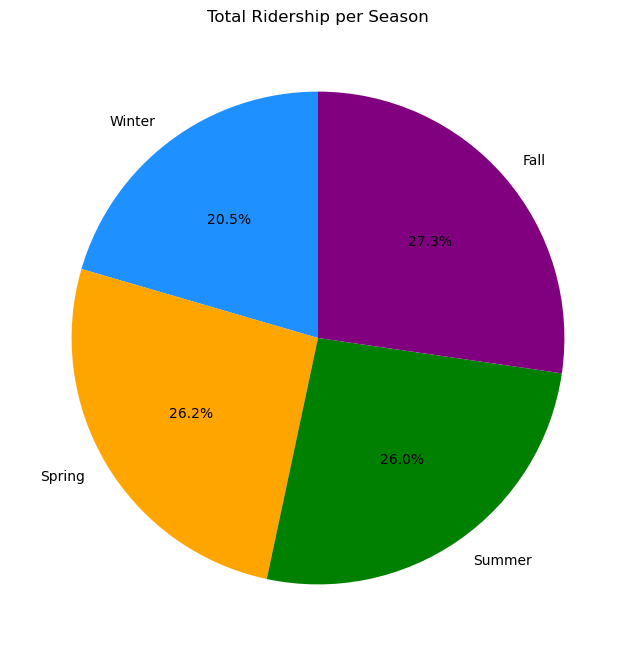

In [137]:
season_order = ["Winter", "Spring", "Summer", "Fall"]
season_sum = df.groupby("Season")["Ridership"].sum().reindex(season_order).reset_index()
plt.figure(figsize=(8,8))
plt.pie(season_sum["Ridership"], labels=season_sum["Season"], autopct='%1.1f%%', startangle=90, colors=["dodgerblue","orange","green","purple"])
plt.title("Total Ridership per Season")
plt.show()

In [15]:
df.groupby("Quarter")["Ridership"].sum().reset_index().sort_values("Ridership", ascending=False)

,Quarter,Ridership
2,3,2130170176
1,2,2007789374
3,4,1954067127
0,1,1838732660


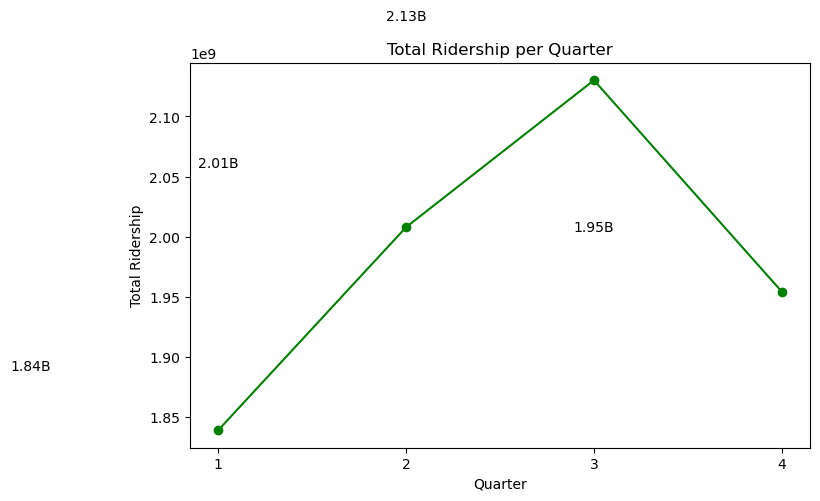

In [136]:
quarter_sum = df.groupby("Quarter")["Ridership"].sum().reset_index()
quarter_sum = quarter_sum.sort_values("Quarter")
plt.figure(figsize=(8,5))
plt.plot(quarter_sum["Quarter"], quarter_sum["Ridership"], marker='o', color="green")
for i, v in enumerate(quarter_sum["Ridership"]):
    plt.text(i, v + 5e7, f'{v/1e9:.2f}B', ha='center')
plt.title("Total Ridership per Quarter")
plt.xlabel("Quarter")
plt.ylabel("Total Ridership")
plt.xticks([1,2,3,4])
plt.show()

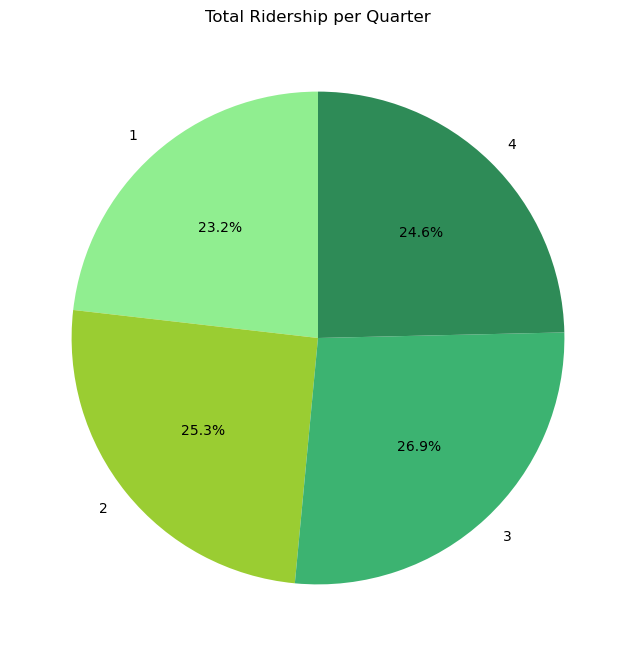

In [135]:
quarter_sum = df.groupby("Quarter")["Ridership"].sum().reset_index()
quarter_sum = quarter_sum.sort_values("Quarter")
plt.figure(figsize=(8,8))
plt.pie(quarter_sum["Ridership"], labels=quarter_sum["Quarter"], autopct='%1.1f%%', startangle=90, colors=["lightgreen","yellowgreen","mediumseagreen","seagreen"])
plt.title("Total Ridership per Quarter")
plt.show()

In [23]:
 df.groupby("Mode")["Ridership"].().reset_index().sort_values("Ridership", ascending=False)

,Mode,Ridership
6,Subways,4280447795
2,Buses,1717716966
5,StatenIsland,1459658489
3,LIRR,231947958
4,MetroNorth,195999394
0,AccessARide,37432255
1,Bridges_Tunnels,7556480


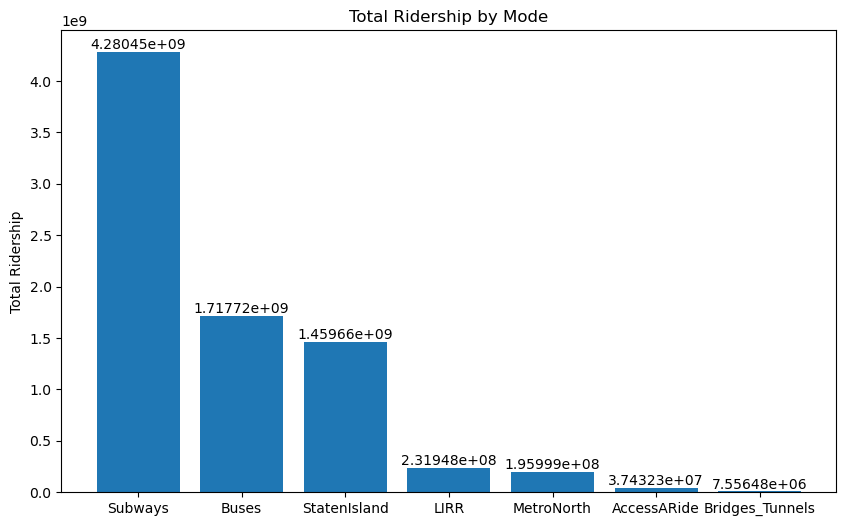

In [134]:
mode_sum = df.groupby("Mode")["Ridership"].sum().reset_index()
mode_sum = mode_sum.sort_values("Ridership", ascending=False)
plt.figure(figsize=(10,6))
plt.bar(mode_sum["Mode"], mode_sum["Ridership"], color="teal")
plt.bar_label(plt.bar(mode_sum["Mode"], mode_sum["Ridership"]))
plt.ylabel("Total Ridership")
plt.title("Total Ridership by Mode")
plt.show()

In [26]:
df.groupby("Day Name")["Ridership"].mean().reset_index().sort_values("Ridership", ascending=False)

,Day Name,Ridership
6,Wednesday,770815.805621
4,Thursday,760546.810304
5,Tuesday,756159.375293
0,Friday,731639.650206
1,Monday,687398.928571
2,Saturday,515619.702528
3,Sunday,426233.165691


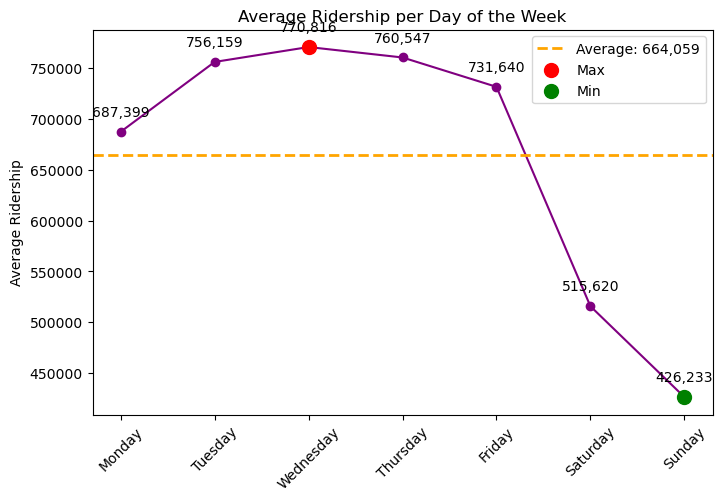

In [133]:
day_avg = df.groupby("Day Name")["Ridership"].mean().reindex(day_order).reset_index()
plt.figure(figsize=(8,5))
plt.plot(day_avg["Day Name"], day_avg["Ridership"], marker='o', color="purple")
avg_value = day_avg["Ridership"].mean()
plt.axhline(y=avg_value, color="orange", linestyle="--", linewidth=2, label=f'Average: {avg_value:,.0f}')
ymax = day_avg["Ridership"].max()
offset = ymax * 0.02
for i, v in enumerate(day_avg["Ridership"]):
    plt.text(i, v + offset, f'{v:,.0f}', ha='center')
max_idx = day_avg["Ridership"].idxmax()
min_idx = day_avg["Ridership"].idxmin()
plt.scatter(max_idx, day_avg.loc[max_idx, "Ridership"], color="red", s=100, zorder=5, label="Max")
plt.scatter(min_idx, day_avg.loc[min_idx, "Ridership"], color="green", s=100, zorder=5, label="Min")
plt.title("Average Ridership per Day of the Week")
plt.ylabel("Average Ridership")
plt.xticks(range(len(day_order)), day_order, rotation=45)
plt.legend()
plt.show()

In [27]:
 df.groupby("Year")["Ridership"].sum().reset_index().sort_values("Ridership", ascending=False)

,Year,Ridership
3,2023,2045966242
2,2022,1871054960
4,2024,1736124563
1,2021,1519557524
0,2020,758056048


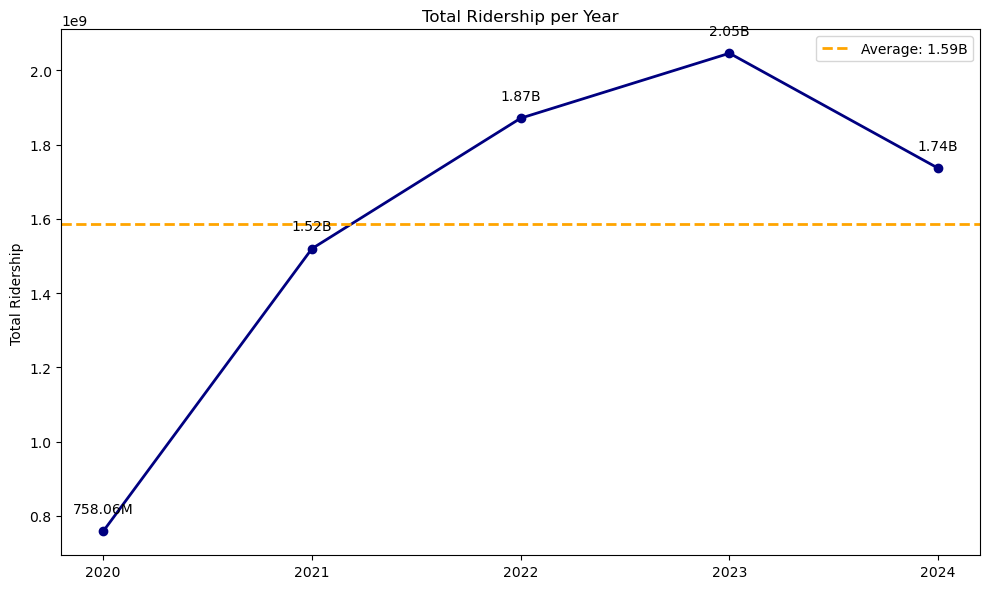

In [132]:
yearly = df.groupby("Year")["Ridership"].sum().reset_index().sort_values("Year")
plt.figure(figsize=(10,6))
plt.plot(yearly["Year"], yearly["Ridership"], marker='o', linewidth=2, markersize=6, color="navy")
avg_value = yearly["Ridership"].mean()
plt.axhline(y=avg_value, color="orange", linestyle="--", linewidth=2, label=f'Average: {avg_value/1e9:.2f}B')
ymax = yearly["Ridership"].max()
offset = ymax * 0.02
for x, y in zip(yearly["Year"], yearly["Ridership"]):
    if y >= 1e9:
        lbl = f'{y/1e9:.2f}B'
    elif y >= 1e6:
        lbl = f'{y/1e6:.2f}M'
    else:
        lbl = f'{y:,.0f}'
    plt.text(x, y + offset, lbl, ha='center', va='bottom')
plt.xticks(yearly["Year"])
plt.title("Total Ridership per Year")
plt.ylabel("Total Ridership")
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
df.groupby("Is_Weekend")["Ridership"].mean()

Is_Weekend
0    741320.048752
1    470834.661484
Name: Ridership, dtype: float64

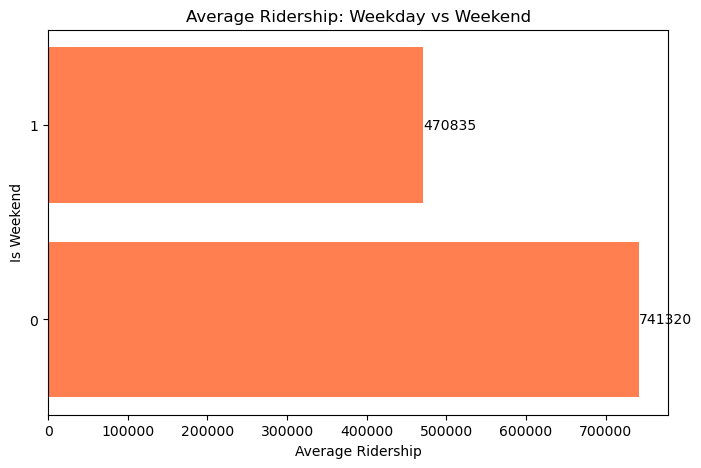

In [131]:
col = "Is_Weekend" if "Is_Weekend" in df.columns else " Is_Weekend"
weekend_avg = df.groupby(col)["Ridership"].mean().reset_index()
plt.figure(figsize=(8,5))
bars = plt.barh(weekend_avg[col].astype(str), weekend_avg["Ridership"], color="coral")
plt.bar_label(bars,)
plt.title("Average Ridership: Weekday vs Weekend")
plt.ylabel("Is Weekend")
plt.xlabel("Average Ridership")
plt.show()

In [29]:
 df.groupby("Month")["Ridership"].mean().reset_index().sort_values("Ridership", ascending=False)

,Month,Ridership
9,10,753041.899539
8,9,725491.412381
2,3,698065.164055
10,11,697235.529762
1,2,660133.592920
11,12,658780.472350
5,6,656909.748571
7,8,638965.652535
4,5,633316.928111
6,7,628852.431336


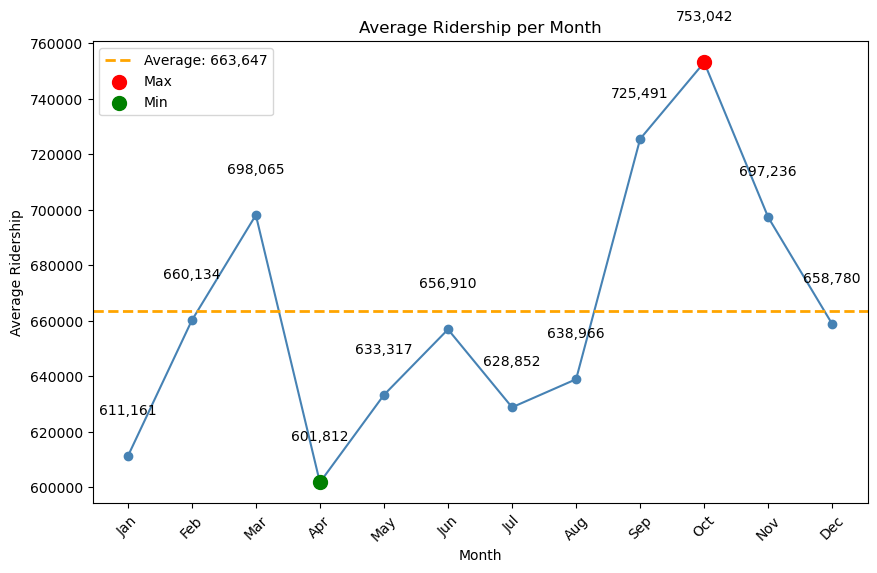

In [130]:
month_order = list(range(1,13))
month_names = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
month_avg = df.groupby("Month")["Ridership"].mean().reindex(month_order).reset_index()
plt.figure(figsize=(10,6))
plt.plot(month_names, month_avg["Ridership"], marker='o', color="steelblue")
avg_value = month_avg["Ridership"].mean()
plt.axhline(y=avg_value, color="orange", linestyle="--", linewidth=2, label=f'Average: {avg_value:,.0f}')
ymax = month_avg["Ridership"].max()
offset = ymax * 0.02
for i, v in enumerate(month_avg["Ridership"]):
    plt.text(i, v + offset, f'{v:,.0f}', ha='center')
max_month = month_avg.loc[month_avg["Ridership"].idxmax()]
min_month = month_avg.loc[month_avg["Ridership"].idxmin()]
plt.scatter(max_month.name, max_month["Ridership"], color="red", s=100, zorder=5, label="Max")
plt.scatter(min_month.name, min_month["Ridership"], color="green", s=100, zorder=5, label="Min")
plt.title("Average Ridership per Month")
plt.xlabel("Month")
plt.ylabel("Average Ridership")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [30]:
 df.groupby("Day")["Ridership"].mean().reset_index().sort_values("Ridership", ascending=False)

,Day,Ridership
8,9,690750.632653
9,10,686686.020408
7,8,686113.522959
14,15,685832.089286
13,14,680032.096939
15,16,677897.520408
11,12,677241.974490
10,11,675881.372449
12,13,673489.594388
5,6,671902.627551


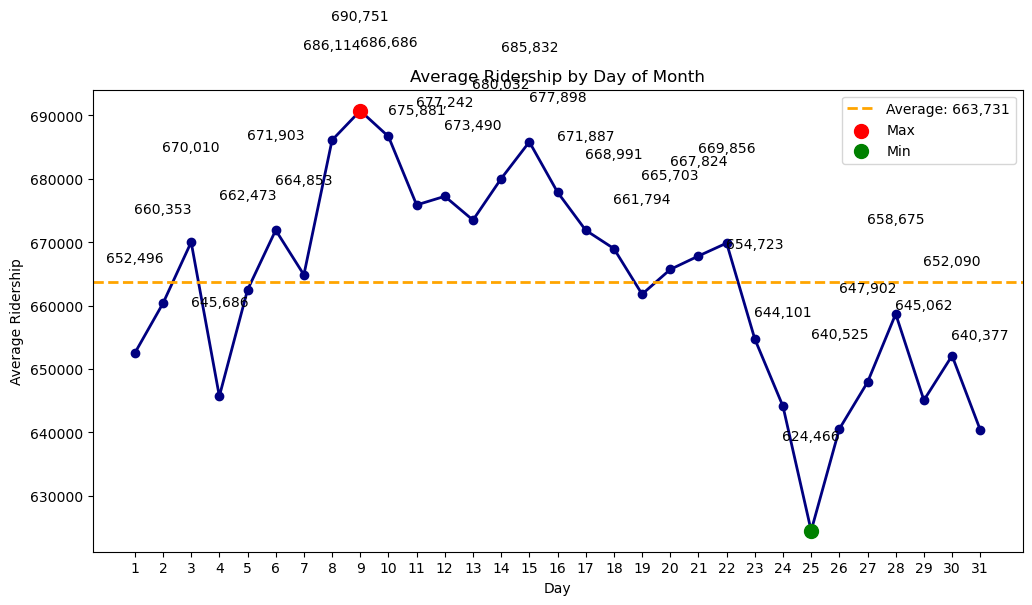

In [129]:
day_avg = df.groupby("Day")["Ridership"].mean().reset_index()
day_avg["Day"] = day_avg["Day"].astype(int)
day_avg = day_avg.sort_values("Day")
plt.figure(figsize=(12,6))
plt.plot(day_avg["Day"], day_avg["Ridership"], marker='o', linewidth=2, color="navy")
avg_value = day_avg["Ridership"].mean()
plt.axhline(y=avg_value, color="orange", linestyle="--", linewidth=2, label=f'Average: {avg_value:,.0f}')
ymax = day_avg["Ridership"].max()
offset = ymax * 0.02
for x, y in zip(day_avg["Day"], day_avg["Ridership"]):
    plt.text(x, y + offset, f'{y:,.0f}', ha='center', va='bottom')
max_day = day_avg.loc[day_avg["Ridership"].idxmax()]
min_day = day_avg.loc[day_avg["Ridership"].idxmin()]
plt.scatter(max_day["Day"], max_day["Ridership"], color="red", s=100, zorder=5, label="Max")
plt.scatter(min_day["Day"], min_day["Ridership"], color="green", s=100, zorder=5, label="Min")
plt.legend()
plt.title("Average Ridership by Day of Month")
plt.xlabel("Day")
plt.ylabel("Average Ridership")
plt.xticks(day_avg["Day"])
plt.show()

In [31]:
df.groupby(df["Holiday Name"].notna())["Ridership"].mean()

Holiday Name
False    669383.599008
True     528714.843750
Name: Ridership, dtype: float64

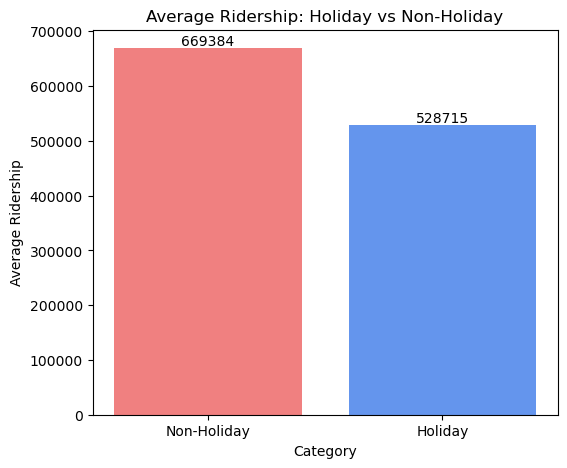

In [128]:
holiday_avg = df.groupby(df["Holiday Name"].notna())["Ridership"].mean().reset_index()
holiday_avg.columns = ["IsHoliday", "Ridership"]
holiday_avg["IsHoliday"] = holiday_avg["IsHoliday"].map({False: "Non-Holiday", True: "Holiday"})
plt.figure(figsize=(6,5))
bars = plt.bar(holiday_avg["IsHoliday"], holiday_avg["Ridership"], color=["lightcoral","cornflowerblue"])
plt.bar_label(bars,)
plt.title("Average Ridership: Holiday vs Non-Holiday")
plt.xlabel("Category")
plt.ylabel("Average Ridership")
plt.show()

In [36]:
prepandemic_pivot = df.pivot_table(
    index="Year",
    columns="Mode",
    values="Pct_PrePandemic",
    aggfunc="mean"
).fillna(0)
prepandemic_pivot

Mode,AccessARide,Bridges_Tunnels,Buses,LIRR,MetroNorth,StatenIsland,Subways
Year,,,,,,,
2020,0.559281,18.758170,0.261373,0.248333,0.165654,72.526144,0.262908
2021,0.733452,30.838356,0.572658,0.430082,0.330548,92.334247,0.464329
2022,0.817288,40.594521,0.629260,0.616575,0.561890,98.068493,0.612575
2023,1.003096,47.578082,0.635918,0.776630,0.708411,100.969863,0.700192
2024,1.202262,50.252459,0.597607,0.876197,0.775344,100.832787,0.711738


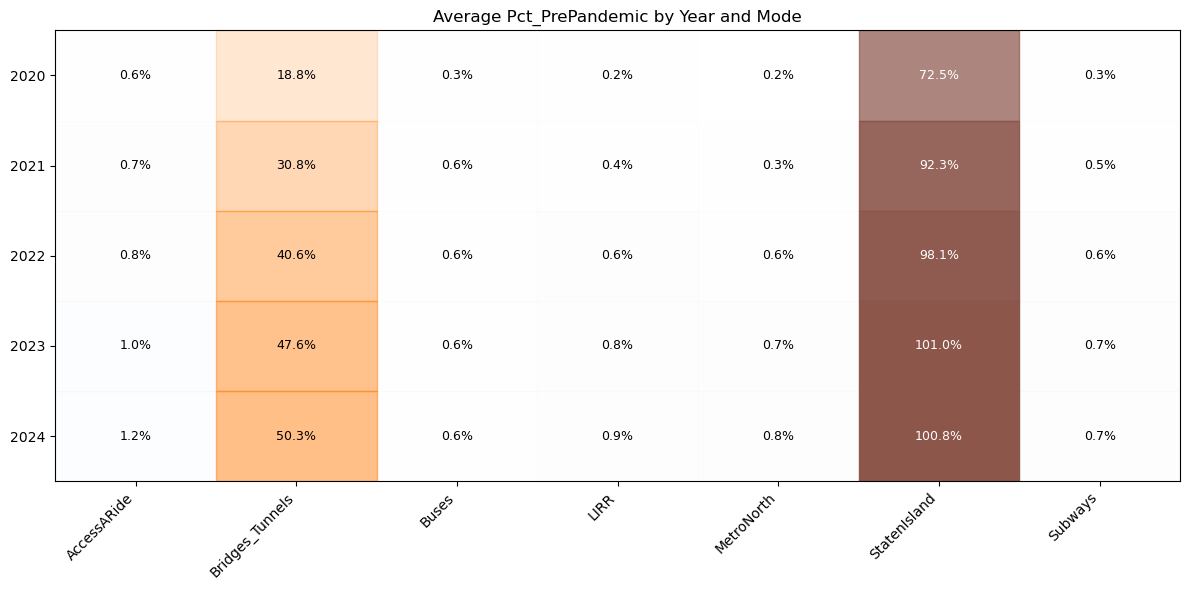

In [127]:
data = prepandemic_pivot.copy()
vals = data.values
display_vals = vals*100 if vals.max() <= 1 else vals
fig, ax = plt.subplots(figsize=(12,6))
n_cols = vals.shape[1]
base_colors = ["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd","#8c564b"]
colors_list = [base_colors[i % len(base_colors)] for i in range(n_cols)]
for j in range(n_cols):
    for i in range(vals.shape[0]):
        rect = plt.Rectangle((j, i), 1, 1, color=colors_list[j], alpha=vals[i,j]/vals.max())
        ax.add_patch(rect)
        ax.text(j+0.5, i+0.5, f'{display_vals[i,j]:.1f}%', ha='center', va='center', fontsize=9, color='white' if vals[i,j]/vals.max()>0.6 else 'black')
ax.set_xticks([x+0.5 for x in range(n_cols)])
ax.set_xticklabels(data.columns, rotation=45, ha='right')
ax.set_yticks([y+0.5 for y in range(vals.shape[0])])
ax.set_yticklabels(data.index)
ax.set_xlim(0, n_cols)
ax.set_ylim(0, vals.shape[0])
ax.invert_yaxis()
ax.set_title("Average Pct_PrePandemic by Year and Mode")
plt.tight_layout()
plt.show()

In [116]:
yearly = df.groupby("Year")["Ridership"].sum().reset_index()
yearly["YoY"] = yearly["Ridership"].pct_change() * 100
yearly

,Year,Ridership,YoY
0,2020,758056048,NaN
1,2021,1519557524,100.454508
2,2022,1871054960,23.131565
3,2023,2045966242,9.348271
4,2024,1736124563,-15.144027


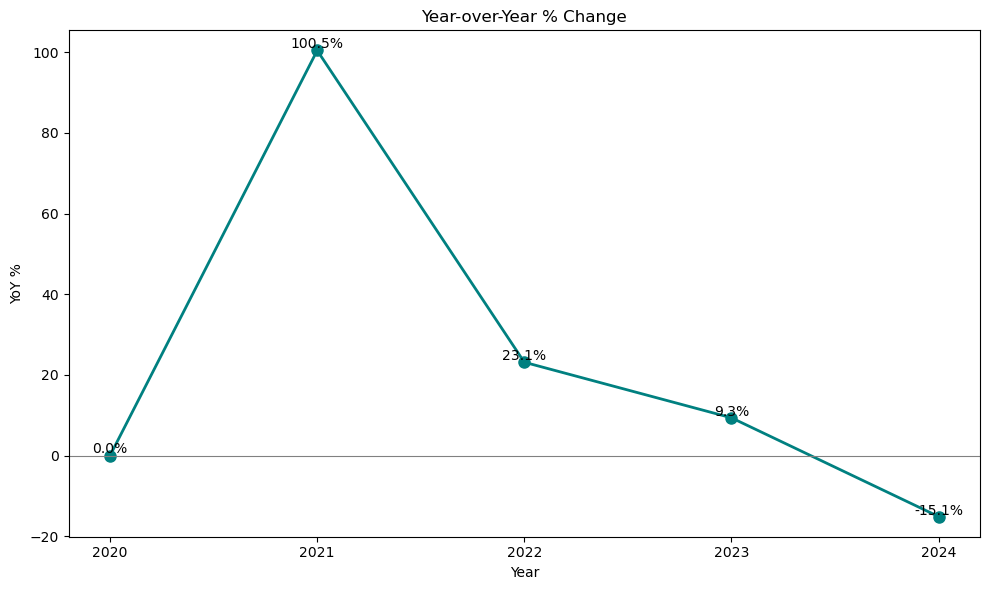

In [126]:
x = yearly["Year"]
y = yearly["YoY"].fillna(0)
plt.figure(figsize=(10,6))
plt.plot(
    x,
    y,
    marker='o',
    markersize=8,
    color="teal",
    linewidth=2
)
for xi, yi in zip(x, y):
    plt.text(xi, yi + 0.5, f'{yi:.1f}%', ha='center')
plt.axhline(0, color="gray", linewidth=0.8)
plt.ylim(min(y)-5, max(y)+5)
plt.title("Year-over-Year % Change")
plt.xlabel("Year")
plt.ylabel("YoY %")
plt.xticks(x)
plt.tight_layout()
plt.show()